In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [218]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [219]:
df.shape

(397, 6)

In [220]:
df.describe()
#standard deviation is high so datas are not normally distributed

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [221]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [222]:
df.corr()["salary"]

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

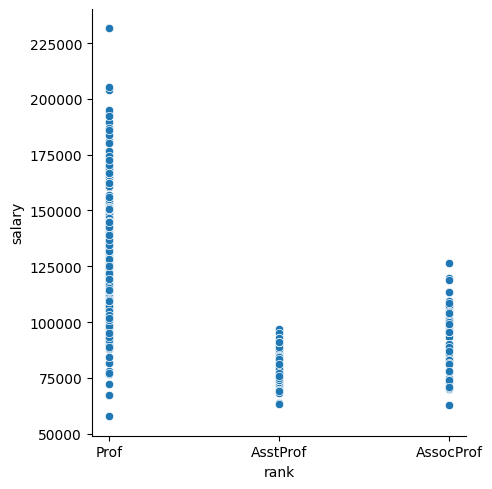

In [223]:
sns.relplot(x="rank",y="salary",data=df)

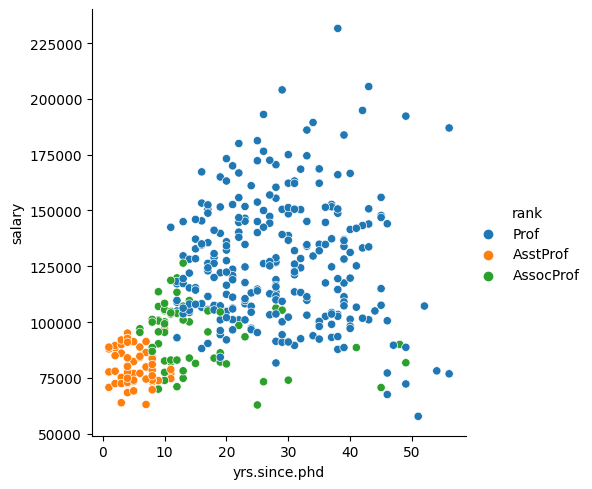

In [224]:
sns.relplot(x="yrs.since.phd",y="salary",data=df,hue="rank")

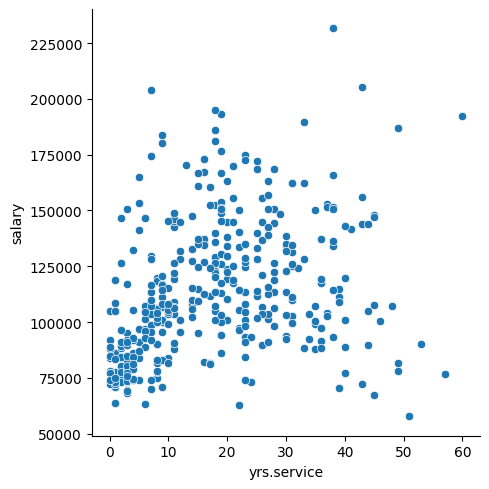

In [225]:
sns.relplot(x="yrs.service",y="salary",data=df)

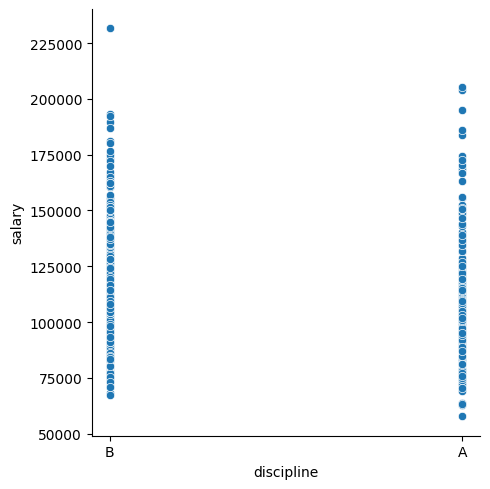

In [226]:
sns.relplot(x="discipline",y="salary",data=df)

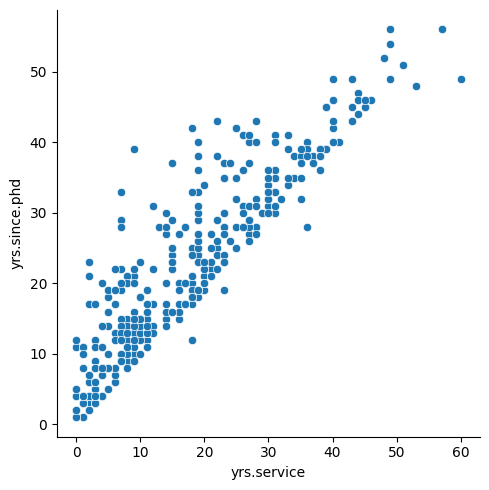

In [227]:
sns.relplot(x="yrs.service",y="yrs.since.phd",data=df)

In [228]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

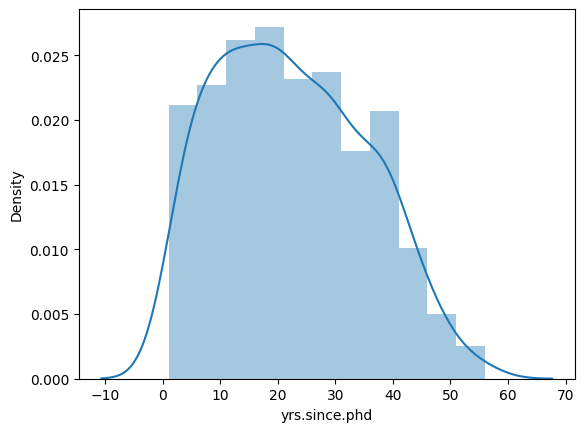

In [229]:
sns.distplot(df["yrs.since.phd"])

/home/revathy/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

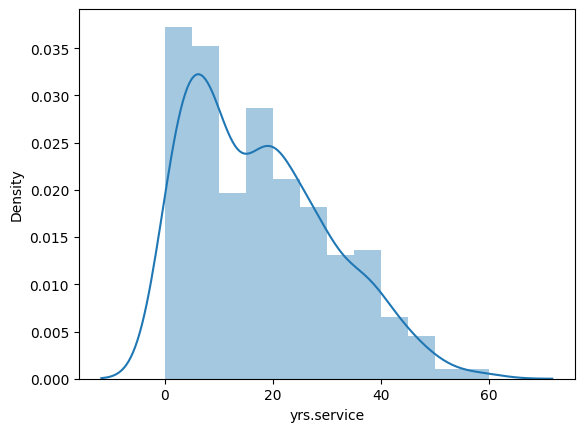

In [230]:
sns.distplot(df["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='rank'>

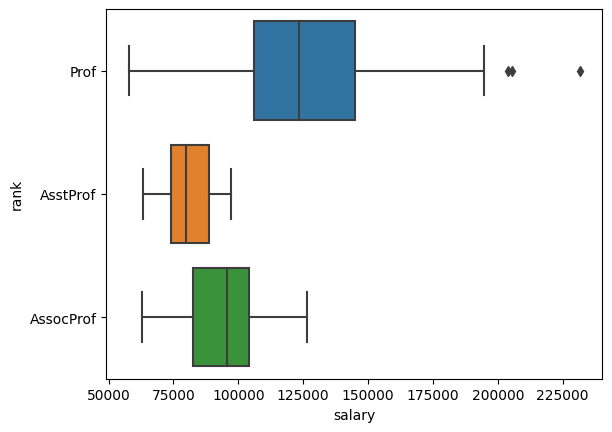

In [231]:
sns.boxplot(x="salary",y="rank",data=df)

<AxesSubplot:xlabel='salary', ylabel='discipline'>

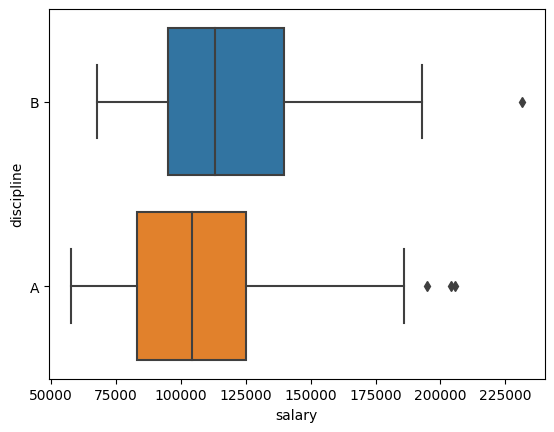

In [232]:
sns.boxplot(x="salary",y="discipline",data=df)

In [233]:
#less outliers
x=df.drop(columns="salary",axis=1)
y=df["salary"]



In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [235]:
dfnew=df
dfnew.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [236]:
dfnew["rank"]=dfnew["rank"].replace("AssocProf",1)
dfnew["rank"]=dfnew["rank"].replace("AsstProf",2)
dfnew["discipline"]=dfnew["discipline"].replace("A",3)
dfnew["discipline"]=dfnew["discipline"].replace("B",3)
dfnew["sex"]=dfnew["sex"].replace("Male",1)
dfnew["sex"]=dfnew["sex"].replace("Female",2)
dfnew["rank"]=dfnew["rank"].replace("Prof",3)
dfnew.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,3,19,18,1,139750
1,3,3,20,16,1,173200
2,2,3,4,3,1,79750
3,3,3,45,39,1,115000
4,3,3,40,41,1,141500


In [237]:
dfnew

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,3,19,18,1,139750
1,3,3,20,16,1,173200
2,2,3,4,3,1,79750
3,3,3,45,39,1,115000
4,3,3,40,41,1,141500
...,...,...,...,...,...,...
392,3,3,33,30,1,103106
393,3,3,31,19,1,150564
394,3,3,42,25,1,101738
395,3,3,25,15,1,95329


In [238]:
x=dfnew.drop(columns="salary",axis=1)
y=dfnew["salary"]

In [239]:

sc=StandardScaler()
lr=sc.fit(x)
lr=LinearRegression()


In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)


In [241]:
lr.fit(x_train,y_train)

LinearRegression()

In [242]:
y_pred=lr.predict(x_test)

In [243]:
score=r2_score(y_test,y_pred)

In [244]:
score

0.28425920609048083

In [245]:
from sklearn.tree import DecisionTreeRegressor

In [246]:
tr=DecisionTreeRegressor()
tr.fit(x_train,y_train)

DecisionTreeRegressor()

In [247]:
y_pred=tr.predict(x_test)

In [248]:
score=r2_score(y_test,y_pred)
score

-0.35862800898510816